# Olympic Data Analysis

This data is available on Kaggle at: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results


Metadata/data dictionary

The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - M or F
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- NOC - National Olympic Committee 3-letter code
- Games - Year and season
- Year - Integer
- Season - Summer or Winter
- City - Host city
- Sport - Sport
- Event - Event
- Medal - Gold, Silver, Bronze, or NA

## Import data 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn

import warnings 
warnings.filterwarnings('ignore') 


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/chloe/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/chloe/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/chloe/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/chloe/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start(

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/chloe/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/chloe/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/chloe/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/chloe/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start(

AttributeError: _ARRAY_API not found

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [3]:
olympics = pd.read_csv('Olympics_data/dataset_olympics.csv') #change data path if necessary
olympics.head(2)

ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer  1992   
1   2   A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer  2012   

   Season       City       Sport                         Event Medal  
0  Summer  Barcelona  Basketball   Basketball Men's Basketball   NaN  
1  Summer     London        Judo  Judo Men's Extra-Lightweight   NaN

### max age is 88, min age is 11, olympics from 1896 to 2016 


In [4]:

print(olympics.info())
olympics.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB
None


ID           Age        Height        Weight          Year
count  70000.000000  67268.000000  53746.000000  52899.000000  70000.000000
mean   18081.846986     25.644645    175.505303     70.900216   1977.766457
std    10235.613253      6.485239     10.384203     14.217489     30.103306
min        1.000000     11.000000    127.000000     25.000000   1896.000000
25%     9325.750000     21.000000    168.000000     61.000000   1960.000000
50%    18032.000000     25.000000    175.000000     70.000000   1984.000000
75%    26978.000000     28.000000    183.000000     79.000000   2002.000000
max    35658.000000     88.000000    223.000000    214.000000   2016.000000

## Data Cleaning

In [5]:
#remove ID column 
df = olympics.drop(['ID'], axis = 1)

#Any NaNs
print('Null Values:')
print(df.isna().sum())

#sex is object - change to 0 and 1 (integer)
df.Sex[df.Sex == 'M'] = 1
df.Sex[df.Sex == 'F'] = 0 

#sex = object so need to change to int
df['Sex'] = df['Sex'].astype('int64')

#Binarise the medal column 
df['Medal_any'] = df['Medal']

#Make any medal awarded = 1
df.Medal_any[df.Medal_any == 'Gold'] = 1
df.Medal_any[df.Medal_any == 'Silver'] = 1
df.Medal_any[df.Medal_any == 'Bronze'] = 1

#Replace NaNs with 0s
df['Medal_any'] = df['Medal_any'].fillna(0)

#Separate by winter and summer olympics 
df_winter = df[(df.Season == 'Winter')]
display(df_winter.head(2))

df_summer = df[(df.Season == 'Summer')]
display(df_summer.head(2))

dataframes = [df_summer, df_winter]

Null Values:
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64


/var/folders/ng/3dbtj71s4j1_26x8pjh3syfw0000gn/T/ipykernel_34240/4224022066.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Sex[df.Sex == 'M'] = 1
/var/folders/ng/3dbtj71s4j1_26x8pjh3syfw0000gn/T/ipykernel_34240/4224022066.py:9: Setti

Name  Sex   Age  Height  Weight         Team  NOC  \
4  Christine Jacoba Aaftink    0  21.0   185.0    82.0  Netherlands  NED   
5  Christine Jacoba Aaftink    0  21.0   185.0    82.0  Netherlands  NED   

         Games  Year  Season     City          Sport  \
4  1988 Winter  1988  Winter  Calgary  Speed Skating   
5  1988 Winter  1988  Winter  Calgary  Speed Skating   

                                Event Medal  Medal_any  
4    Speed Skating Women's 500 metres   NaN          0  
5  Speed Skating Women's 1,000 metres   NaN          0

Name  Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0  A Dijiang    1  24.0   180.0    80.0  China  CHN  1992 Summer  1992   
1   A Lamusi    1  23.0   170.0    60.0  China  CHN  2012 Summer  2012   

   Season       City       Sport                         Event Medal  \
0  Summer  Barcelona  Basketball   Basketball Men's Basketball   NaN   
1  Summer     London        Judo  Judo Men's Extra-Lightweight   NaN   

   Medal_any  
0          0  
1          0

In [6]:
#display both summer and winter dataframes
for data in dataframes:
    print(data.shape)
    display(data.describe())

(58467, 15)


Sex           Age        Height        Weight          Year  \
count  58467.000000  55801.000000  44485.000000  43819.000000  58467.000000   
mean       0.747687     25.761097    175.623469     70.888416   1976.015154   
std        0.434344      6.768449     10.717793     14.644317     31.079097   
min        0.000000     12.000000    127.000000     25.000000   1896.000000   
25%        0.000000     21.000000    168.000000     61.000000   1956.000000   
50%        1.000000     25.000000    175.000000     70.000000   1984.000000   
75%        1.000000     29.000000    183.000000     79.000000   2000.000000   
max        1.000000     88.000000    223.000000    214.000000   2016.000000   

          Medal_any  
count  58467.000000  
mean       0.143739  
std        0.350828  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

(11533, 15)


Sex           Age       Height       Weight          Year  \
count  11533.000000  11467.000000  9261.000000  9080.000000  11533.000000   
mean       0.707708     25.077963   174.937696    70.957159   1986.644759   
std        0.454835      4.838165     8.581228    11.945708     22.566074   
min        0.000000     11.000000   148.000000    40.000000   1924.000000   
25%        0.000000     22.000000   169.000000    62.000000   1972.000000   
50%        1.000000     24.000000   175.000000    70.000000   1992.000000   
75%        1.000000     28.000000   181.000000    79.000000   2006.000000   
max        1.000000     57.000000   206.000000   127.000000   2014.000000   

          Medal_any  
count  11533.000000  
mean       0.111506  
std        0.314771  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

## EDA - Exploratory Data Analysis

In [7]:
season_count = df.groupby(['Year', 'Season']).size().reset_index(name='Count')

summ = season_count[season_count['Season'] == 'Summer']
wint = season_count[season_count['Season'] == 'Winter']


### Timeline

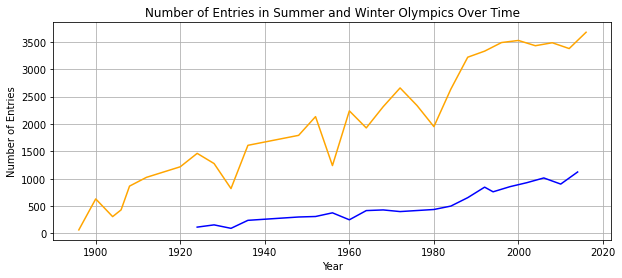

In [8]:

plt.figure(figsize = (10, 4))

plt.plot(summ['Year'], summ['Count'], color = 'orange')
plt.plot(wint['Year'], wint['Count'], color = 'blue')

plt.title('Number of Entries in Summer and Winter Olympics Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Entries')

plt.grid()
plt.show()

### Histograms

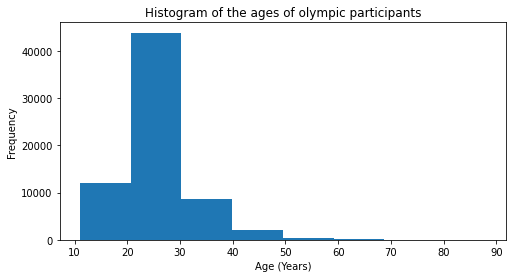

In [9]:
#histogram of ages - summer and winter olympics combined
plt.figure(figsize = (8,4))
plt.hist(df['Age'], bins = 8)

plt.title('Histogram of the ages of olympic participants')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')

plt.show()

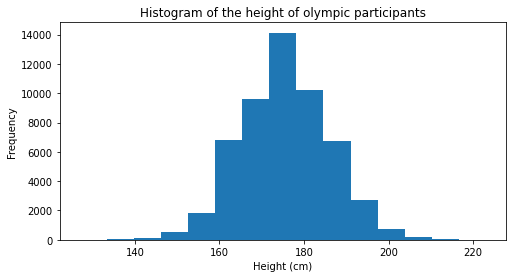

In [10]:
#histogram of height - summer and winter olympics combined
plt.figure(figsize = (8,4))
plt.hist(df['Height'], bins = 15)

plt.title('Histogram of the height of olympic participants')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

plt.show()

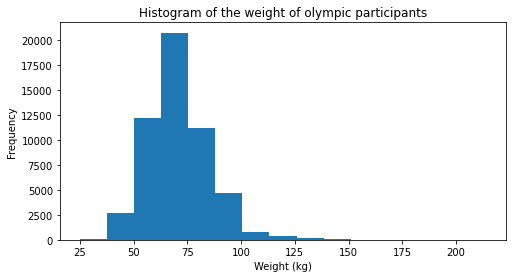

In [11]:
#histogram of weight - summer and winter olympics combined
plt.figure(figsize = (8,4))
plt.hist(df['Weight'], bins = 15)

plt.title('Histogram of the weight of olympic participants')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

plt.show()

### Boxplots

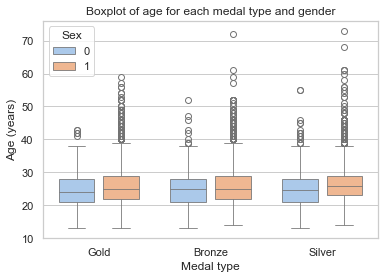

In [12]:
#boxplot of age for each medal type and gender
sns.set_theme(style="whitegrid", palette="pastel")
p = sns.boxplot(data = df, x = 'Medal' ,  y= 'Age', hue= 'Sex', gap=.2, linewidth=.8)
p.set(xlabel='Medal type', ylabel='Age (years)', title = 'Boxplot of age for each medal type and gender')
plt.show()

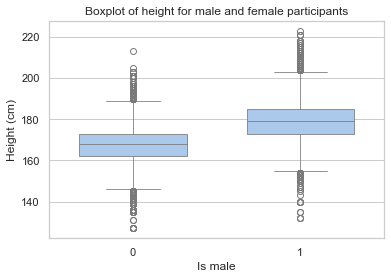

In [13]:
# boxplot for height and gender 
sns.set_theme(style="whitegrid", palette="pastel")
p = sns.boxplot(data = df, x = 'Sex' ,  y= 'Height', gap=.2, linewidth=.8)
p.set(xlabel='Is male', ylabel='Height (cm)', title = 'Boxplot of height for male and female participants')
plt.show()

### Count data for summer and winter games

In [14]:
df.groupby('Season').count()

Name    Sex    Age  Height  Weight   Team    NOC  Games   Year  \
Season                                                                    
Summer  58467  58467  55801   44485   43819  58467  58467  58467  58467   
Winter  11533  11533  11467    9261    9080  11533  11533  11533  11533   

         City  Sport  Event  Medal  Medal_any  
Season                                         
Summer  58467  58467  58467   8404      58467  
Winter  11533  11533  11533   1286      11533

### Filter and analyse medal winners only 

In [15]:
#filter by medal or no medal column 
#medal winners 

df_medal_winners = df[(df.Medal_any == 1)]
df_medal_winners.shape

(9690, 15)

In [16]:
#group by summer and winter olympics and sex
#look at the means between medal winners in both winter and summer games
df_medal_winners.groupby(['Season','Sex'])[['Age', 'Height', 'Weight']].mean()


Age      Height     Weight
Season Sex                                  
Summer 0    24.487782  171.425185  63.444194
       1    26.620393  181.571863  79.584301
Winter 0    25.212617  166.982630  60.552163
       1    26.450408  179.746246  78.452234

The mean weight and height of winter olympic participants is (marginally) less than summer particpants, for both males and females


In [17]:
#groupby country
countries_medals = df.groupby(['NOC'])[['Age', 'Height', 'Weight', 'Medal_any']].mean()
#sort by highest ratio of medal winners
countries_medals.sort_values(by = 'Medal_any', ascending = False)


Age      Height     Weight  Medal_any
NOC                                             
ANZ  23.571429  171.800000  64.000000   0.434783
URS  24.727660  175.593385  72.551961   0.428809
GDR  23.166972  174.662963  69.372222   0.372477
EUN  24.843750  175.362319  71.382979   0.320988
USA  26.349292  177.132865  72.515971   0.299271
..         ...         ...        ...        ...
WIF  34.600000  183.000000  80.400000   0.000000
YEM  21.363636  166.937500  58.937500   0.000000
YAR  22.750000  165.285714  63.714286   0.000000
YMD  20.000000  175.000000  65.000000   0.000000
ZAM  23.105263  170.029412  65.111111   0.000000

[226 rows x 4 columns]

In [18]:
total_medals_country = df_medal_winners.groupby(['NOC'])[['Medal_any']].sum()
#top 10 countries with highest medal counts for both summer and winter games
total_medals_country.sort_values(['Medal_any'], ascending = False).head(10)

Medal_any
NOC           
USA       1561
FRA        660
GBR        604
ITA        604
URS        515
GER        434
AUS        373
SWE        365
CAN        360
NED        272

Summer games - countries with the most medals

NOC  Season  Medal_any
0  USA  Summer       1386
1  FRA  Summer        596
2  GBR  Summer        569
3  ITA  Summer        535
4  URS  Summer        435
5  AUS  Summer        364
6  GER  Summer        351
7  SWE  Summer        271
8  NED  Summer        248
9  HUN  Summer        241

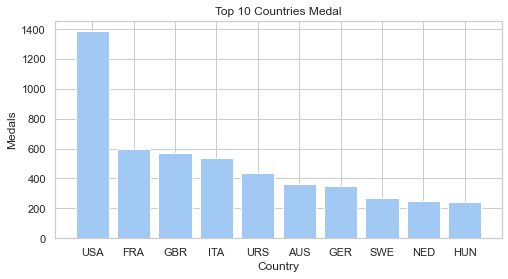

In [19]:
# summer games only 
total_medals_country_summer = df_summer.groupby(['NOC', 'Season'])[['Medal_any']].sum()
summer_top10 = total_medals_country_summer.sort_values('Medal_any', ascending = False).head(10)
summer_top10 = summer_top10.reset_index()
display(summer_top10)

plt.figure(figsize = (8,4))
plt.bar(summer_top10['NOC'], summer_top10['Medal_any'])

plt.title('Top 10 Countries Medal')
plt.xlabel('Country')
plt.ylabel('Medals')

plt.show()

#USA has more than 2-fold higher medal count than the second highest country

Winter games - countries with the most medals

NOC  Season  Medal_any
0  USA  Winter        175
1  CAN  Winter        146
2  NOR  Winter        143
3  SWE  Winter         94
4  SUI  Winter         87
5  GER  Winter         83
6  URS  Winter         80
7  ITA  Winter         69
8  FRA  Winter         64
9  RUS  Winter         59

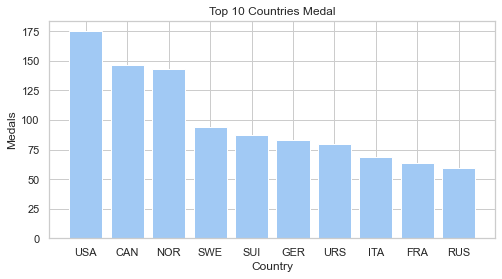

In [20]:
#winter games only 
total_medals_country_winter = df_winter.groupby(['NOC', 'Season'])[['Medal_any']].sum()
winter_top10 = total_medals_country_winter.sort_values('Medal_any', ascending = False).head(10)
winter_top10 = winter_top10.reset_index()
display(winter_top10)

plt.figure(figsize = (8,4))
plt.bar(winter_top10['NOC'], winter_top10['Medal_any'])

plt.title('Top 10 Countries Medal')
plt.xlabel('Country')
plt.ylabel('Medals')

plt.show()

Summer and Winter combined - countries with the highest medal count

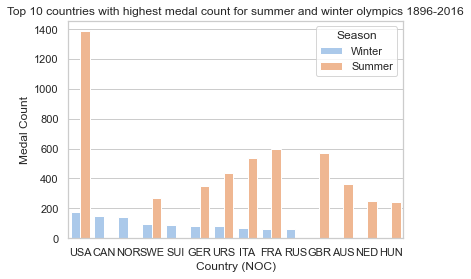

In [21]:
#Join summer and winter top 10 countries to find countries with the most medals in both seasons
top_sum_win = pd.concat([winter_top10, summer_top10], axis = 0)

#bar for top 10 for summer and winter combined into one plot 
top_10_bar = sns.barplot(x='NOC', y='Medal_any', data=top_sum_win, hue='Season').set(title='Top 10 countries with highest medal count for summer and winter olympics 1896-2016', 
                                                                                     xlabel='Country (NOC)', ylabel='Medal Count')

Medal winners - age and height scatterplot for each medal type

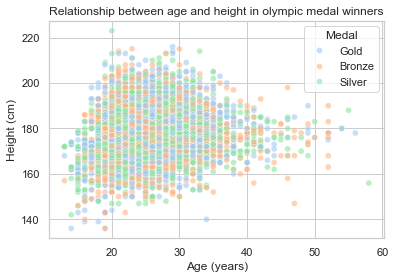

In [22]:
#medal winners 
Age_height_scatter = sns.scatterplot(x='Age', y='Height', data=df_medal_winners, hue='Medal', 
                alpha = 0.6).set(title='Relationship between age and height in olympic medal winners',
ylabel='Height (cm)', xlabel = 'Age (years)')


## Hypothesis: Countries have a greater chance of winning medals if they have the home advantage 

In [23]:
#get list of the unique cities
olympic_cities = [df['City'].unique()]

#create column to provide the country NOC for the host city
df['City_NOC'] = df['City']
df.head(2)


Name  Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0  A Dijiang    1  24.0   180.0    80.0  China  CHN  1992 Summer  1992   
1   A Lamusi    1  23.0   170.0    60.0  China  CHN  2012 Summer  2012   

   Season       City       Sport                         Event Medal  \
0  Summer  Barcelona  Basketball   Basketball Men's Basketball   NaN   
1  Summer     London        Judo  Judo Men's Extra-Lightweight   NaN   

   Medal_any   City_NOC  
0          0  Barcelona  
1          0     London

In [24]:
      
#make city the NOC
df.City_NOC[df.City_NOC == 'Barcelona'] = 'ESP'
df.City_NOC[df.City_NOC == 'London'] = 'GBR'
df.City_NOC[df.City_NOC == 'Antwerpen'] = 'BEL'
df.City_NOC[df.City_NOC == 'Paris'] = 'FRA'
df.City_NOC[df.City_NOC == 'Calgary'] = 'CAN'
df.City_NOC[df.City_NOC == 'Albertville'] = 'FRA'
df.City_NOC[df.City_NOC == 'Lillehammer'] ='NOR'
df.City_NOC[df.City_NOC == 'Los Angeles'] = 'USA'
df.City_NOC[df.City_NOC == 'Salt Lake City'] = 'USA'
df.City_NOC[df.City_NOC == 'Helsinki'] = 'FIN'
df.City_NOC[df.City_NOC == 'Lake Placid'] = 'USA'
df.City_NOC[df.City_NOC == 'Sydney'] ='AUS'
df.City_NOC[df.City_NOC == 'Atlanta'] = 'USA'
df.City_NOC[df.City_NOC == 'Stockholm'] = 'SWE'
df.City_NOC[df.City_NOC == 'Sochi'] = 'RUS'
df.City_NOC[df.City_NOC == 'Nagano'] = 'JPN'
df.City_NOC[df.City_NOC == 'Torino'] ='ITA'
df.City_NOC[df.City_NOC == 'Beijing'] = 'CHN'
df.City_NOC[df.City_NOC == 'Rio de Janeiro'] = 'BRA'
df.City_NOC[df.City_NOC == 'Athina'] = 'GRE'
df.City_NOC[df.City_NOC == 'Squaw Valley'] ='USA'
df.City_NOC[df.City_NOC == 'Innsbruck'] ='AUT'
df.City_NOC[df.City_NOC == 'Sarajevo'] ='BIH'
df.City_NOC[df.City_NOC == 'Mexico City'] = 'MEX'
df.City_NOC[df.City_NOC == 'Munich'] = 'GER'
df.City_NOC[df.City_NOC == 'Seoul'] ='KOR'
df.City_NOC[df.City_NOC == 'Berlin'] = 'GER'
df.City_NOC[df.City_NOC == 'Oslo'] = 'NOR'
df.City_NOC[df.City_NOC == "Cortina d'Ampezzo"] ='ITA'
df.City_NOC[df.City_NOC == 'Melbourne'] ='AUS'
df.City_NOC[df.City_NOC == 'Roma'] ='ITA'
df.City_NOC[df.City_NOC == 'Amsterdam'] ='NED'
df.City_NOC[df.City_NOC == 'Montreal'] ='CAN'
df.City_NOC[df.City_NOC == 'Moskva'] ='RUS'
df.City_NOC[df.City_NOC == 'Tokyo'] ='JPN'
df.City_NOC[df.City_NOC == 'Vancouver'] ='CAN'
df.City_NOC[df.City_NOC == 'Grenoble'] ='FRA'
df.City_NOC[df.City_NOC == 'Sapporo'] ='JPN'
df.City_NOC[df.City_NOC == 'Chamonix'] ='FRA'
df.City_NOC[df.City_NOC == 'St. Louis'] ='USA'
df.City_NOC[df.City_NOC == 'Sankt Moritz'] ='SUI'
df.City_NOC[df.City_NOC == 'Garmisch-Partenkirchen'] ='GER'

#Filter for rows were the NOC is the same as city NOC 
home_advan = df.copy()
home_advan = home_advan[(home_advan['NOC'] == home_advan['City_NOC'])]
home_advan 

#5229 rows

/var/folders/ng/3dbtj71s4j1_26x8pjh3syfw0000gn/T/ipykernel_34240/513742176.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.City_NOC[df.City_NOC == 'Barcelona'] = 'ESP'
/var/folders/ng/3dbtj71s4j1_26x8pjh3syfw0000gn/T/ipykernel_34240/5

/var/folders/ng/3dbtj71s4j1_26x8pjh3syfw0000gn/T/ipykernel_34240/513742176.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.City_NOC[df.City_NOC == 'St. Louis'] ='USA'
/var/folders/ng/3dbtj71s4j1_26x8pjh3syfw0000gn/T/ipykernel_34240/5

Name  Sex   Age  Height  Weight  \
29           Einar Ferdinand "Einari" Aalto    1  26.0     NaN     NaN   
49                  Paavo Johannes Aaltonen    1  32.0   175.0    64.0   
50                  Paavo Johannes Aaltonen    1  32.0   175.0    64.0   
51                  Paavo Johannes Aaltonen    1  32.0   175.0    64.0   
52                  Paavo Johannes Aaltonen    1  32.0   175.0    64.0   
...                                     ...  ...   ...     ...     ...   
69958            Joseph H. "Joe" Fitzgerald    1  24.0   185.0    86.0   
69973       Thomas Vincent "Tom" Fitzgerald    1  30.0   185.0    84.0   
69974  Benita P. Fitzgerald-Brown (-Mosley)    0  23.0   178.0    65.0   
69988                 Casey J. FitzRandolph    1  27.0   180.0    79.0   
69989                 Casey J. FitzRandolph    1  27.0   180.0    79.0   

                Team  NOC        Games  Year  Season            City  \
29           Finland  FIN  1952 Summer  1952  Summer        Helsinki   
49           Finland  FIN  1952 Summer  1952  Summer        Helsinki   
50           Finland  FIN  1952 Summer  1952  Summer        Helsinki   
51           Finland  FIN  1952 Summer  1952  Summer        Helsinki   
52           Finland  FIN  1952 Summer  1952  Summer        Helsinki   
...              ...  ...          ...   ...     ...             ...   
69958  United States  USA  1996 Summer  1996  Summer         Atlanta   
69973  United States  USA  1996 Summer  1996  Summer         Atlanta   
69974  United States  USA  1984 Summer  1984  Summer     Los Angeles   
69988  United States  USA  2002 Winter  2002  Winter  Salt Lake City   
69989  United States  USA  2002 Winter  2002  Winter  Salt Lake City   

               Sport                                   Event   Medal  \
29          Swimming     Swimming Men's 400 metres Freestyle     NaN   
49        Gymnastics  Gymnastics Men's Individual All-Around     NaN   
50        Gymnastics        Gymnastics Men's Team All-Around  Bronze   
51        Gymnastics         Gymnastics Men's Floor Exercise     NaN   
52        Gymnastics            Gymnastics Men's Horse Vault     NaN   
...              ...                                     ...     ...   
69958       Handball                 Handball Men's Handball     NaN   
69973       Handball                 Handball Men's Handball     NaN   
69974      Athletics    Athletics Women's 100 metres Hurdles    Gold   
69988  Speed Skating          Speed Skating Men's 500 metres    Gold   
69989  Speed Skating        Speed Skating Men's 1,000 metres     NaN   

       Medal_any City_NOC  
29             0      FIN  
49             0      FIN  
50             1      FIN  
51             0      FIN  
52             0      FIN  
...          ...      ...  
69958          0      USA  
69973          0      USA  
69974          1      USA  
69988          1      USA  
69989          0      USA  

[5229 rows x 16 columns]

In [25]:
medal_winners_home = home_advan.groupby(['NOC', 'Season'])[['Medal_any']].sum()
medal_winners_home = medal_winners_home.sort_values('Medal_any', ascending = False)
medal_winners_home


Medal_any
NOC Season           
USA Summer        337
GBR Summer        156
FRA Summer        132
BEL Summer         76
SWE Summer         61
AUS Summer         60
USA Winter         42
GER Summer         40
ITA Summer         40
GRE Summer         28
CHN Summer         26
NOR Winter         22
CAN Winter         19
ESP Summer         16
SUI Winter         15
NED Summer         14
BRA Summer         14
ITA Winter         13
FRA Winter         13
RUS Winter         12
CAN Summer          7
KOR Summer          6
JPN Summer          6
GER Winter          3
AUT Winter          2
FIN Summer          1
JPN Winter          1
MEX Summer          1

[Text(0.5, 1.0, 'Medal count for Olympics in the countries home city \n for the summer and winter olympics 1896-2016'),
 Text(0.5, 0, 'Country (NOC)'),
 Text(0, 0.5, 'Medal Count')]

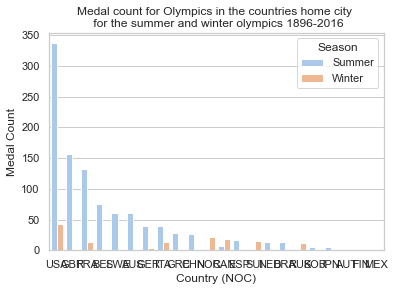

In [26]:
sns.barplot(x='NOC', y='Medal_any', data=medal_winners_home, hue='Season').set(title='Medal count for Olympics in the countries home city \n for the summer and winter olympics 1896-2016', 
                                                                                     xlabel='Country (NOC)', ylabel='Medal Count')

In [27]:

#Calculate mean medal count per country 
NOC_mean_medal_count = df.groupby(['NOC', 'Season'])[['Medal_any']].mean()

#Find the number of medals per country for home olympics 
mean_medal_count_homead = home_advan.groupby(['NOC', 'Season'])[['Medal_any']].mean()

#join home advantage medal count mean and all medal count mean tables together 
mean_medal_count_home_vs_all = pd.merge(NOC_mean_medal_count, mean_medal_count_homead, how = 'inner', on = ['NOC', 'Season'],suffixes=('_total_mean', '_home_mean'))
mean_medal_count_home_vs_all
#inner join to collect only data with both mean values for home advantage and total

Medal_any_total_mean  Medal_any_home_mean
NOC Season                                           
AUS Summer              0.176442             0.190476
AUT Winter              0.118380             0.068966
BEL Summer              0.125389             0.393782
BRA Summer              0.112630             0.060606
CAN Summer              0.113108             0.041916
    Winter              0.189610             0.180952
CHN Summer              0.208487             0.285714
ESP Summer              0.100228             0.087432
FIN Summer              0.134276             0.034483
FRA Summer              0.145579             0.195556
    Winter              0.079208             0.100775
GBR Summer              0.183135             0.254072
GER Summer              0.229412             0.347826
    Winter              0.156604             0.250000
GRE Summer              0.077381             0.140704
ITA Summer              0.163909             0.243902
    Winter              0.075658             0.092199
JPN Summer              0.130548             0.181818
    Winter              0.034965             0.032258
KOR Summer              0.121495             0.127660
MEX Summer              0.042553             0.007874
NED Summer              0.187029             0.150538
NOR Winter              0.223787             0.314286
RUS Winter              0.167614             0.190476
SUI Winter              0.154255             0.319149
SWE Summer              0.172173             0.269912
USA Summer              0.332294             0.361976
    Winter              0.167464             0.248521

Text(0.5, 0, 'Total mean medal count vs home mean medal count')

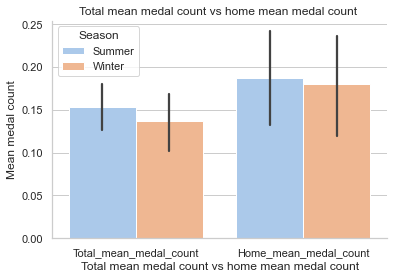

In [28]:
#reset the index 
mean_medal_count_home_vs_all = mean_medal_count_home_vs_all.reset_index()

#rename columns 
mean_medal_count_home_vs_all.columns  = [ 'NOC', 'Season', 'Total_mean_medal_count', 'Home_mean_medal_count']

#melt dataframe to use for plot
mean_medal_count_home_vs_all_melt = pd.melt(mean_medal_count_home_vs_all, id_vars=["NOC", 'Season'], var_name="home_vs_away", value_name="mean_medal_count")


#plot bar graph 

ax = sns.barplot(x='home_vs_away', y='mean_medal_count', hue='Season', data=mean_medal_count_home_vs_all_melt)
ax.spines[['top', 'right']].set_visible(False)
ax.set_title('Total mean medal count vs home mean medal count ')
ax.set_ylabel('Mean medal count')
ax.set_xlabel('Total mean medal count vs home mean medal count')


Hypothesis is accepted. The mean medal count is higher when a country has the home advantage for both summer and winter games.

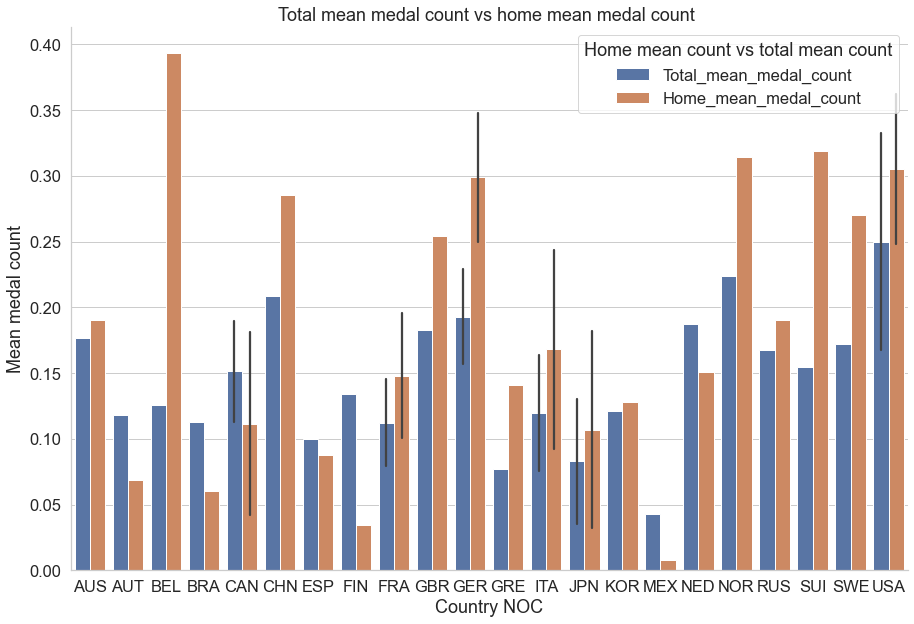

In [29]:
#plot bar graph for individual countries 

from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
sns.set(style="whitegrid", font_scale = 1.5)
ax = sns.barplot(x='NOC', y='mean_medal_count', hue='home_vs_away', data=mean_medal_count_home_vs_all_melt)
ax.spines[['top', 'right']].set_visible(False)
ax.set_title('Total mean medal count vs home mean medal count ')
ax.set_ylabel('Mean medal count')
ax.set_xlabel('Country NOC')
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.0, 1.0), title='Home mean count vs total mean count')


#save figure
fig = ax.get_figure()
fig.savefig("Mean_medal_count_per_country_total_vs_home.png") 


Begium has the greatest increase in medals won when they have a home advantage. 

## Top winning altheletes

In [30]:
#Filter df into male and female 
df_male = df[(df.Sex == 1)]
df_female = df[(df.Sex == 0)]

df_male.sort_values('Medal_any',ascending = False)

#Top 20? male athletes with the most medals 
male_20 = df_male.groupby(['Name', 'Sex'])[['Medal_any']].sum().sort_values('Medal_any', ascending = False).head(20)


#Top 20? female athletes with the most medals 
female_20 = df_female.groupby(['Name', 'Sex'])[['Medal_any']].sum().sort_values('Medal_any', ascending = False).head(20)

#Merge by row 
top20_f_m = pd.concat([male_20, female_20], axis = 0)


display(top20_f_m)

Medal_any
Name                                 Sex           
Nikolay Yefimovich Andrianov         1           15
Ole Einar Bjrndalen                  1           13
Matthew Nicholas "Matt" Biondi       1           11
Viktor Ivanovych Chukarin            1           11
Aleksandr Nikolayevich Dityatin      1           10
Raymond Clarence "Ray" Ewry          1           10
Usain St. Leo Bolt                   1            8
Roger Franois Ducret                 1            8
Charles Meldrum "Charlie" Daniels    1            8
Philippe Louis Eugne Cattiau         1            8
Kjetil Andr Aamodt                   1            8
Sven Fischer                         1            8
Gustaf Vilhelm Carlberg              1            8
Viktor An                            1            8
Nathan Ghar-Jun Adrian               1            8
Ivar Eugen Ballangrud (Eriksen-)     1            7
Yukio Endo                           1            7
Christian Marie Auguste d'Oriola     1            6
Giuseppe Delfino                     1            6
Georges Eugne William "Go" Buchard   1            6
Natalie Anne Coughlin (-Hall)        0           12
Birgit Fischer-Schmidt               0           12
Vra slavsk (-Odloilov)               0           11
Polina Hryhorivna Astakhova          0           10
Marit Bjrgen                         0           10
Stefania Belmondo                    0           10
Ursula "Uschi" Disl                  0            9
Shirley Frances Babashoff            0            9
Nadia Elena Comneci (-Conner)        0            9
Allyson Michelle Felix               0            9
Veronica Angella Campbell-Brown      0            8
Inge de Bruijn                       0            8
Kornelia Ender (-Matthes, -Grummt)   0            8
Karin Enke-Kania (-Busch-, -Richter) 0            8
Amanda Ray Beard (-Brown)            0            7
Manuela Di Centa                     0            7
Simona Amnar (-Tabr)                 0            7
Andrea Ehrig-Schne-Mitscherlich      0            7
Agneta Monica Andersson              0            7
Krisztina Egerszegi                  0            7

Highest number of medals won for a male athelete was 15 by Nikolay Yefimovich Andrianov. 
Highest number of medals won for a female athelete was 12 by Natalie Anne Coughlin (-Hall)	. 

In [35]:
#join the 40 athletes from summer or winter games with the overall most medals (20 males and 20 females) with the main dataframe to get the details 
top20_df = pd.merge(top20_f_m, df, how = 'left', on = ['Name', 'Sex'])
top20_df=top20_df.rename(columns = {'Medal_any_x':'Total_medal_count'})
top20_df.head(3)

Name  Sex  Total_medal_count   Age  Height  Weight  \
0  Nikolay Yefimovich Andrianov    1                 15  19.0   166.0    60.0   
1  Nikolay Yefimovich Andrianov    1                 15  19.0   166.0    60.0   
2  Nikolay Yefimovich Andrianov    1                 15  19.0   166.0    60.0   

           Team  NOC        Games  Year  Season    City       Sport  \
0  Soviet Union  URS  1972 Summer  1972  Summer  Munich  Gymnastics   
1  Soviet Union  URS  1972 Summer  1972  Summer  Munich  Gymnastics   
2  Soviet Union  URS  1972 Summer  1972  Summer  Munich  Gymnastics   

                                    Event   Medal  Medal_any_y City_NOC  
0  Gymnastics Men's Individual All-Around     NaN            0      GER  
1        Gymnastics Men's Team All-Around  Silver            1      GER  
2         Gymnastics Men's Floor Exercise    Gold            1      GER

## Statistical Analysis - Pearson's correlation

In [36]:
#correlation between Total medal count and Age
from scipy.stats import pearsonr
corr, _ = pearsonr(top20_df['Total_medal_count'], top20_df['Age'])
print('Pearsons correlation: %.3f' % corr)

#remove NaNs from weight and height column
top20_df = top20_df.dropna(subset=['Weight', 'Height'])

#correlation between Total medal count and Age
corr, _ = pearsonr(top20_df['Total_medal_count'], top20_df['Weight'])
print('Pearsons correlation: %.3f' % corr)

#correlation between Total medal count and Age
corr, _ = pearsonr(top20_df['Total_medal_count'], top20_df['Height'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.009
Pearsons correlation: -0.053
Pearsons correlation: -0.023


There is no/very little correlation between total medal count in the top 20 men and women and their age/weight/height

## Modelling

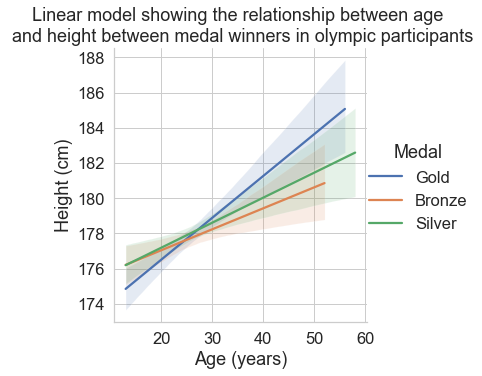

In [37]:
# age or height and medal type

sns.lmplot(data=df, x="Age", y="Height", hue="Medal", scatter = False).set(title='Linear model showing the relationship between age \n and height between medal winners in olympic participants',
ylabel='Height (cm)', xlabel = 'Age (years)')

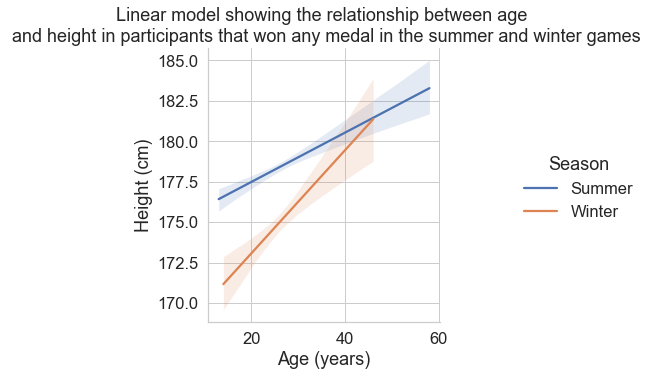

In [38]:
#Age and Height and season
sns.lmplot(data=df_medal_winners, x="Age", y="Height", hue="Season", scatter = False).set(title='Linear model showing the relationship between age \n and height in participants that won any medal in the summer and winter games',
ylabel='Height (cm)', xlabel = 'Age (years)')


Script written by Chloe Sargent 

Last modified: 12/09/2024